# Práctica 1. Procesamiento de datos y aprendizaje supervisado.
## Autor: Marcos Tendero Carmona. Fecha: 26/12/2024

# Introducción
El desarrollo de la primera práctica de la asignatura tiene como objetivo la puesta en práctica de los conocimientos adquiridos en las unidades 1 y 2 referentes al empleo de algoritmos de aprendizaje supervisado para la resolución de problemas.

Recordamos que el aprendizaje supervisado es un enfoque de aprendizaje automático en el que un modelo aprende a partir de un conjunto de datos etiquetados, es decir, datos que incluyen tanto las entradas como las salidas correctas. En este tipo de aprendizaje, el modelo es entrenado para predecir o clasificar nuevas observaciones basándose en ejemplos previos.

En concreto, se propone la resolución de dos tareas, correspondientes a los dos tipos de problemas de aprendizaje supervisado estudiados: el ejercicio 1 corresponde a un problema de regresión, en el que se predice una variable continua, mientras que el segundo ejercicio consiste en un problema de clasificación, en el que se asignan las observaciones a categorías o clases específicas.

El desarrollo técnico de la práctica se ha llevado a cabo en Python, en un Jupyter notebook, siguiendo como referencia el cuaderno de la unidad 2. En esta memoria se comentan las partes significativas del código. El código completo se adjunta en la carpeta de la entrega.

---

# Ejercicio 1: estimación del precio de coches usados
En el primer ejercicio, queremos estimar el precio de venta de un coche de segunda mano en base a sus características. Para ello planteamos entrenar un modelo en base a datos históricos de tasación de vehículos, que asocian las características de estos a su precio de venta. Esta descripción nos hace entender que nos encontramos ante un problema de regresión.

El dataset de tasación de vehículos con el que trabajamos en este ejercicio contiene las siguientes columnas:

| Columna            | Descripción                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| **ID**             | Identificador del coche                                                    |
| **marca**          | Marca del vehículo (Ej. Audi, BMW, Skoda...)                               |
| **modelo**         | Modelo del coche (Ej. A7)                                                  |
| **fecha**          | Fecha de fabricación del vehículo, informa sobre su antigüedad             |
| **tipo_cambio**    | Tipo de cambio del coche (manual, automático...)                           |
| **total_km**       | Kilometraje actual del coche                                               |
| **tipo_combustible** | Tipo de combustible (diésel, gasolina...)                                |
| **consumo**        | Consumo de combustible del coche, medido en litros por cada 100 km         |
| **tipo_motor**     | Tamaño del motor, relacionado con la potencia (Ej. 3.0)                   |
| **tasa**           | Impuesto necesario para circular con el coche, medido en euros (€)        |
| **precio**         | Precio de venta del coche de segunda mano, variable objetivo.             |

El conjunto de datos está dividido en un dataset de entrenamiento del modelo, `dataset_coches_train.csv`, de 4960 entradas, y un conjunto de testeo de 2672 registros, `dataset_coches_test.csv`, con el que evaluaremos la eficiencia y la capacidad de generalización del modelo.

El conjunto de datos de trabajo, tanto de este ejercicio como del siguiente, viene previamente dividido en dos archivos, por lo que realizaremos el proceso de carga de manera directa.



# Modelo Propuesto
Se nos pide un modelo de aprendizaje que permita predecir la variable **precio** con un error absoluto medio (MAE) inferior a 3000€ en el conjunto de testeo.

Se ha propuesto el uso del algoritmo **Random Forest**, que combina (ensambla) múltiples árboles de decisión que, aplicado a problemas de regresión, predicen un valor continuo para cada entrada dada. El resultado final se calcula como el promedio de los valores predichos por todos los árboles.

A continuación, se muestra la implementación en código del modelo comp
- Mostramos todos las librerías importadas, así como los paquetes de scikit-learnleto:
- En primer lugar, cargamos ambos datasets CSV (entrenamiento y testeo) en variables con Pandas.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

########### Ejercicio 1 ###########
#Carga de datos
train_cars = pd.read_csv('datasets/dataset_coches_train.csv')
test_cars = pd.read_csv('datasets/dataset_coches_test.csv')


Una vez hemos cargado los datos, comenzamos el análisis contestando a las cuestiones propuestas en el orden en el que se han resuelto en el script:

### Pregunta 1: Representar gráficamente la distribución de la variable **precio** en el conjunto de entrenamiento
Para ello, usamos las librerías **matplotlib** y **seaborn** para la visualización gráfica de la distribución de la columna `precio` de nuestro dataset de entrenamiento. Imprimimos la distribución como un histograma de frecuencia de precios con su estimación de densidad de Kernel:

 **Resultado:** Observamos que el precio más repetido se concentra entre los 17500€ y los 20000€.

---

### Pregunta 2: ¿Cuál es la marca más cara en promedio? ¿Y la más barata? 
Utilizamos el conjunto de entrenamiento.

Para esto, realizamos una secuencia de operaciones de agregación sencillas usando funciones de DataFrames de **Pandas**:
1. Agrupamos el conjunto por `marca`.
2. Nos quedamos con la columna de precios y calculamos el promedio por marca.
3. Segmentamos los precios máximo y mínimo utilizando las funciones `max()` y `min()` y obtenemos el nombre de la marca con los índices asociados a estos valores, `idxmax()` y `idxmin()`.

---

### Pregunta 3: Representar gráficamente la dependencia entre el precio y la fecha
Utilizamos el conjunto de entrenamiento.

Para ello, usamos `scatterplot` de **seaborn** con `x=fecha` e `y=precio`. 

 **Resultado:** Podemos observar una tendencia de crecimiento casi exponencial del precio de los vehículos con el paso del tiempo.


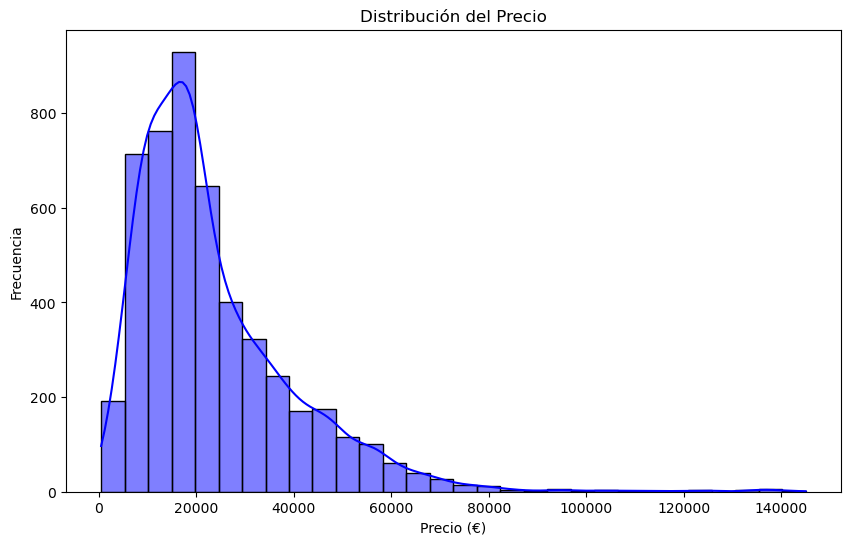

Marca más barata en promedio: vauxhall - Precio promedio: 11884.520146520146 €
Marca más cara en promedio: audi - Precio promedio: 42330.967930029154 €


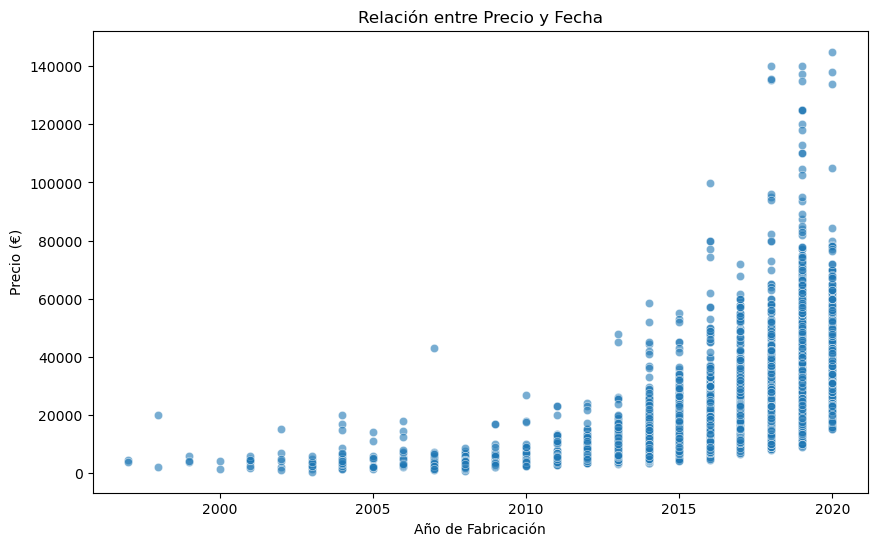

In [5]:
#P1: Distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.histplot(train_cars['precio'], kde=True, bins=30, color='blue')
plt.title('Distribución del Precio')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.show()

#P2: Marca más cara y más barata
mean_price_by_brand = train_cars.groupby('marca')['precio'].mean()
print("Marca más barata en promedio:", mean_price_by_brand.idxmin(), "- Precio promedio:", mean_price_by_brand.min(), "€")
print("Marca más cara en promedio:", mean_price_by_brand.idxmax(), "- Precio promedio:", mean_price_by_brand.max(), "€")

#P3: Relación entre precio y fecha
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_cars['fecha'], y=train_cars['precio'], alpha=0.6)
plt.title('Relación entre Precio y Fecha')
plt.xlabel('Año de Fabricación')
plt.ylabel('Precio (€)')
plt.show()


### Implementación del algoritmo Random Forest
En primer lugar, realizamos un procesamiento de datos para emplear el modelo, consistente en:

1. **Codificación de variables categóricas:**  
   En **scikit-learn**, los modelos requieren que todas las características sean numéricas. Usamos **codificación One Hot** con la función `OneHotEncoder` de **scikit-learn**.  
   - NOTA: Aunque el uso de `drop='first'` no es necesario para el algoritmo Random Forest (ya que no es sensible a la colinealidad), es recomendable si se planea expandir el análisis a otros modelos que sí lo son, como regresión lineal o logística.  
   - Usamos la función `get_feature_names_out` para generar nombres para las nuevas columnas binarias.  

2. **Eliminación de columnas innecesarias:**  
   Eliminamos columnas que no aportan al análisis, como el `ID`.

3. **Transformación de los datasets:**  
   - La función `fit_transform` se usa en el conjunto de entrenamiento, ya que permite que el codificador "aprenda" los parámetros añadidos por el encoder.
   - La función `transform` se aplica al conjunto de testeo, utilizando los parámetros aprendidos previamente.

4. **Normalización de variables numéricas:**  
   Probamos el uso de **normalización estándar**, diferenciándonos del enfoque del notebook de referencia de la Unidad 2.

---

### Entrenamiento del modelo
1. **Separación de variables:**  
   Separamos las variables características del **target** (`precio`).

2. **Entrenamiento del modelo:**  
   Entrenamos el modelo **Random Forest** con el conjunto de entrenamiento.

---

### Predicción y evaluación
1. **Predicción:**  
   Utilizamos la función `predict` para predecir los valores del conjunto de testeo.

2. **Evaluación:**  
   Comprobamos la eficiencia del modelo con el **error absoluto medio (MAE)**, obteniendo un resultado exitoso (MAE < 3000€).


In [7]:
#Procesamiento de datos
#Eliminamos columnas no relevantes
train_cars = train_cars.drop(['ID'], axis=1)  
test_cars = test_cars.drop(['ID'], axis=1)

#Codificación de variables categóricas
categorical_features = ['marca', 'modelo', 'tipo_cambio', 'tipo_combustible']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_train = pd.DataFrame(encoder.fit_transform(train_cars[categorical_features]))
encoded_test = pd.DataFrame(encoder.transform(test_cars[categorical_features]))

#Las agregamos al dataset
encoded_train.columns = encoder.get_feature_names_out(categorical_features)
encoded_test.columns = encoder.get_feature_names_out(categorical_features)
train_cars = pd.concat([train_cars.drop(categorical_features, axis=1), encoded_train], axis=1)
test_cars = pd.concat([test_cars.drop(categorical_features, axis=1), encoded_test], axis=1)

#Normalización estándar de variables numéricas
scaler = StandardScaler()
numerical_features = ['total_km', 'consumo', 'tipo_motor', 'tasa']
train_cars[numerical_features] = scaler.fit_transform(train_cars[numerical_features])
test_cars[numerical_features] = scaler.transform(test_cars[numerical_features])

#Separación de X (características) e Y (target)
X_train = train_cars.drop('precio', axis=1)
y_train = train_cars['precio']
X_test = test_cars.drop('precio', axis=1)
y_test = test_cars['precio']

#Entrenamiento del modelo 
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

#Predicción y evaluación
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print("MAE del conjunto de validación:", mae, "€")



MAE del conjunto de validación: 1895.7567118113243 €


### Pregunta 4: Analizar las variables más significativas
Para identificar las variables más significativas del dataset en nuestro modelo, utilizamos la función `feature_importances_` del módulo **ensemble** de **scikit-learn**.

1. **Extracción de importancias:**  
   Imprimimos las 10 variables más significativas según su importancia en el modelo.

2. **Resultados:**  
   Podemos observar que, con diferencia, el **tipo de motor** es la variable de mayor importancia, seguida de la **fecha** y el **número de kilómetros**.

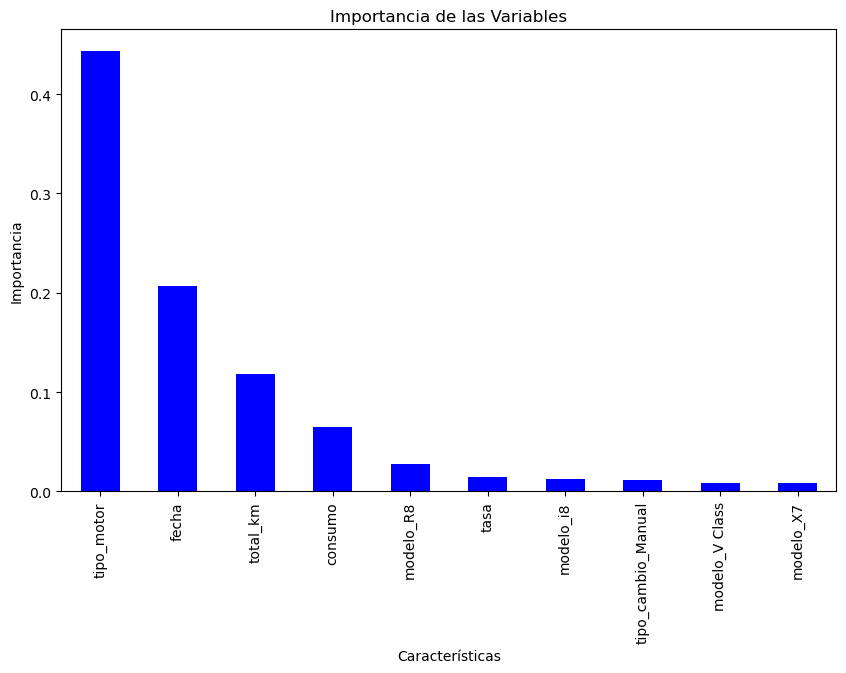

Variables más importantes:
 tipo_motor            0.442982
fecha                 0.206486
total_km              0.118296
consumo               0.064836
modelo_R8             0.027290
tasa                  0.014631
modelo_i8             0.012197
tipo_cambio_Manual    0.011048
modelo_V Class        0.007962
modelo_X7             0.007936
dtype: float64


In [9]:
#P4: Variables más significativas
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar', color='blue')
plt.title('Importancia de las Variables')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()
print("Variables más importantes:\n", feature_importances.head(10))



### Pregunta 5: Predicción de precio para un caso específico
Un amigo quiere vender un **Audi A7** de **2020** con las siguientes características:  
- **Kilometraje:** 5000 km  
- **Cambio:** Automático  
- **Combustible:** Híbrido  
- **Consumo:** 5.5 l/100km  
- **Motor:** 4.0  
- **Tasa de circulación:** 200€  

---

### Solución
Con el modelo entrenado y testeado, realizamos una predicción para este caso. Definimos las características del coche como un diccionario para facilitar el manejo de datos:


In [11]:
#P5: Predicción del precio de un Audi A7
new_car = pd.DataFrame({
    'total_km': [5000],
    'consumo': [5.5],
    'tipo_motor': [4.0],
    'tasa': [200],
    'fecha': [2020],
    'marca_Audi': [1],
    'modelo_A7': [1],
    'tipo_cambio_automático': [1],
    'tipo_combustible_híbrido': [1]
})

#Agregar columnas faltantes
missing_cols = [col for col in X_train.columns if col not in new_car.columns]
new_car = pd.concat([new_car, pd.DataFrame(0, index=new_car.index, columns=missing_cols)], axis=1)
new_car = new_car[X_train.columns]

#Predicción del precio
predicted_price = model.predict(new_car)[0]
print(f"El precio recomendado para el Audi A7 es: {predicted_price:.2f} €")




El precio recomendado para el Audi A7 es: 63183.74 €


## Ajuste de Hiperparámetros

He probado a ajustar hiperparámetros en ambos modelos para evaluar si mejora su eficiencia. Para ello, usé **GridSearchCV**, creando un grid con los hiperparámetros más destacables de **Random Forest**:

| **Hiperparámetro**    | **Descripción**                                                                 |
|-----------------------|-------------------------------------------------------------------------------|
| **n_estimators**      | Número de árboles. Más árboles pueden mejorar el rendimiento, pero aumentan el tiempo de cómputo. |
| **max_depth**         | Profundidad máxima de los árboles. Limitarla ayuda a prevenir sobreajuste, dejarla como `None` permite que crezcan completamente. |
| **min_samples_split** | Número mínimo de muestras necesarias para dividir un nodo.                   |
| **min_samples_leaf**  | Número mínimo de muestras que debe contener una hoja. Valores altos mejoran la generalización. |
| **max_features**      | Número máximo de características consideradas para dividir en cada nodo.      |

---

### Ajuste de hiperparámetros para el modelo regresor
Definimos el siguiente grid de hiperparámetros con posibles valores para el modelo regresor:

1. Configuramos **GridSearchCV**:
   - Especificamos el modelo, el grid de hiperparámetros.
   - Métrica de evaluación: **MAE** (Error Absoluto Medio).
   - Valoración cruzada: número de particiones definidas.
   - Otros parámetros: uso de núcleos y texto de progreso.

2. Entrenamos el modelo ajustado:
   - Obtenemos el mejor modelo con `best_estimator_`.
   - Realizamos la predicción y evaluamos el modelo.

**Resultados:** Para el **Ejercicio 1**, no obtenemos mejores resultados tras el ajuste de hiperparámetros.


In [13]:
#Evaluación del modelo ajustando hiperparámetros
param_grid = {
    'n_estimators': [100, 200],      #Menos valores para el número de árboles
    'max_depth': [None, 20],         #Menos opciones de profundidad
    'min_samples_split': [2, 10],    #División mínima
    'min_samples_leaf': [1, 2],      #Menos valores para hojas mínimas
    'max_features': ['sqrt']         #Fijar un valor común para max_features
}

#Configuramos GridSearchCV
grid_search = GridSearchCV(
    estimator=model,                   
    param_grid=param_grid,   
    scoring='neg_mean_absolute_error', 
    cv=5,                              
    verbose=1,                         
    n_jobs=-1                         
)

#Entrenar el nuevo modelo
grid_search.fit(X_train, y_train)

#Evaluación del mejor modelo
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
best_mae = mean_absolute_error(y_test, predictions)

print("Error Absoluto Medio (MAE) del mejor modelo:", best_mae, "€")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Error Absoluto Medio (MAE) del mejor modelo: 1903.0840985879533 €


# Ejercicio 2: Predicción del resultado de una campaña de marketing telefónica

El caso de estudio del segundo ejercicio consiste en la campaña anual de marketing telefónico de un banco, cuyo objetivo es ofrecer depósitos a plazo fijo a sus clientes. Disponemos de datos recopilados los últimos tres años, a partir de los cuales se nos pide desarrollar un modelo predictivo para mejorar los resultados de contratación (tasa de conversión de la campaña) enfocándose en los clientes con mayor probabilidad de contratación del producto.

Dado que la variable objetivo es la contratación o no del producto, estamos ante un problema de **clasificación**.

Dichos datos se almacenan en un dataset cuyas columnas se listan y describen en la siguiente tabla:

| **Columna**             | **Descripción**                                                                            |
|-------------------------|------------------------------------------------------------------------------------------|
| **edad**                | Edad del cliente, en años                                                                |
| **empleo**              | Tipo de empleo del cliente                                                               |
| **estado**              | Estado civil del cliente: soltero, casado, divorciado, etc.                              |
| **educación**           | Nivel de estudios del cliente                                                            |
| **impago**              | Indica si el cliente tiene algún impago pendiente                                        |
| **hipoteca**            | Indica si el cliente tiene contratada una hipoteca                                       |
| **préstamo**            | Indica si el cliente tiene contratado un préstamo                                        |
| **tipo_contacto**       | Indica si se contactó con el cliente por teléfono fijo o móvil (`cellular`)               |
| **mes**                 | Mes en el que se contactó con el cliente                                                 |
| **dia_semana**          | Día de la semana en el que se contactó con el cliente                                    |
| **contactos_actual**    | Número de veces que se ha contactado con el cliente en la campaña actual                 |
| **contactos_anterior**  | Número de veces que se ha contactado con el cliente en la campaña anterior               |
| **resultado_anterior**  | Resultado de la campaña anterior: `success`, `failure` o `nonexistent`                   |
| **tasa_var_empleo_3m**  | Indicador macroeconómico: variación en la tasa de empleo trimestral                       |
| **euribor_3m**          | Indicador macroeconómico: valor del Euribor trimestral                                   |
| **ipc_1m**              | Indicador macroeconómico: valor del IPC (Índice de Precios al Consumidor) mensual        |
| **target**              | Resultado de la campaña: `yes` si contrató el producto, `no` en caso contrario           |

De nuevo, en nuestra situación de partida disponemos del dataset previamente separado entre conjunto de entrenamiento y conjunto de validación:

- **Conjunto de entrenamiento:** `dataset_marketing_train.csv` con 32,652 registros.  
- **Conjunto de validación:** `dataset_marketing_test.csv` con 8,536 registros.
keting_test.csv` con 8,536 registros.


## Modelo Propuesto

De nuevo, se propone el uso del algoritmo **Random Forest**, esta vez enfocado a un problema de clasificación. En este caso, cada árbol de decisión predice una clase para una entrada dada, siendo el resultado final para dicha entrada la clase obtenida por la mayoría de los árboles.

---

### Procesamiento de datos

1. **Carga de datos:**  
   Análoga a la del ejercicio 1.

2. **Procesamiento del dataset:**  
   - **Mapeo de la variable objetivo:**  
     Convertimos la variable `target` a un formato binario (`yes` mapeado a 1, `no` mapeado a 0).
   - **Separación de características y target:**  
     Dividimos el dataset en variables independientes (características) y la variable dependiente (objetivo).
   - **Codificación One Hot:**  
     Aplicamos **One Hot Encoding** a las variables categóricas. Este último paso se describe en la **Pregunta 3**.
de para clasificación.


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, auc, roc_curve

########### Ejercicio 2 ###########
#Carga de datos
train_marketing = pd.read_csv('datasets/dataset_marketing_train.csv')
test_marketing = pd.read_csv('datasets/dataset_marketing_test.csv')

#Transformación de la columna target
train_marketing['target'] = train_marketing['target'].map({'yes': 1, 'no': 0})
test_marketing['target'] = test_marketing['target'].map({'yes': 1, 'no': 0})

#Separación de características (X) y variable objetivo (y)
y_train = train_marketing['target']
y_test = test_marketing['target']
X_train = train_marketing.drop('target', axis=1)
X_test = test_marketing.drop('target', axis=1)


### Pregunta 3: Transformar, al menos, las variables estado y resultado_anterior utilizando one-hot encoding

De la misma forma que en el ejercicio anterior, necesitamos codificar las variables categóricas a variables numéricas para que puedan ser entrada del modelo de AA. Para ello, volvemos a detectar las variables categóricas (tipo = `objeto`) y las transformamos con el codificador **One Hot** utilizando las funciones `fit_transform` y `transform`. 

He tenido que añadir una transformación intermedia que pasa las variables categóricas a strings, ya que me saltaba un error (lo solucioné con ChatGPT).

In [18]:
#Identificar columnas categóricas y convertirlas a string
categorical_features = X_train.select_dtypes(include=['object']).columns
X_train[categorical_features] = X_train[categorical_features].astype(str)
X_test[categorical_features] = X_test[categorical_features].astype(str)

#P3: Transformación de las variables estado y resultado_anterior
encoder = OneHotEncoder(drop='first', sparse_output=False)

#Codificación de todas las variables categóricas seleccionadas
encoded_train = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]))
encoded_test = pd.DataFrame(encoder.transform(X_test[categorical_features]))

#Agregar nombres de las columnas codificadas
encoded_train.columns = encoder.get_feature_names_out(categorical_features)
encoded_test.columns = encoder.get_feature_names_out(categorical_features)
X_train = pd.concat([X_train.drop(categorical_features, axis=1).reset_index(drop=True), encoded_train.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.drop(categorical_features, axis=1).reset_index(drop=True), encoded_test.reset_index(drop=True)], axis=1)

#Alineación de columnas
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)



## Entrenamiento y evaluación del modelo
1. Una vez hemos dispuesto el formato de las variables, entrenamos el modelo con `fit()`.
2. Finalmente, evaluamos la precisión del modelo con el conjunto de testeo, obteniendo un resultado satisfactorio con el algoritmo seleccionado (**precisión mayor del 60%**).


In [20]:
#Entrenamiento del modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Evaluación de la precisión del modelo
predictions = model.predict(X_test)
precision = precision_score(y_test, predictions)
print("Precisión en conjunto de validación:", precision)


Precisión en conjunto de validación: 0.7459807073954984


### Pregunta 1: Calcular el ratio de conversión (porcentaje de clientes que contratan) de la campaña en el conjunto de entrenamiento

Con el modelo entrenado, calculamos la tasa de conversión como la media de la variable objetivo, ya que está dispuesta como una variable binaria.


In [22]:
#P1: Ratio de conversión
conversion_rate = y_train.mean()
print("Ratio de conversión:", conversion_rate * 100, "%")

Ratio de conversión: 12.241210339336028 %


### Pregunta 2: ¿Cómo influye el día de la semana de contacto en el resultado de la campaña? ¿Y el mes?

Utilizando el conjunto de entrenamiento, creamos un **diagrama de barras** que muestra la tasa de conversión por día de la semana y por mes. (Omitimos el código por analogía al primer ejercicio).

---

### Resultados:
- **Día de la semana:**  
  El lunes es el día de menor contratación.
  
- **Mes:**  
  Marzo, Septiembre, Octubre y Diciembre destacan como los meses más exitosos en términos de tasa de conversión.


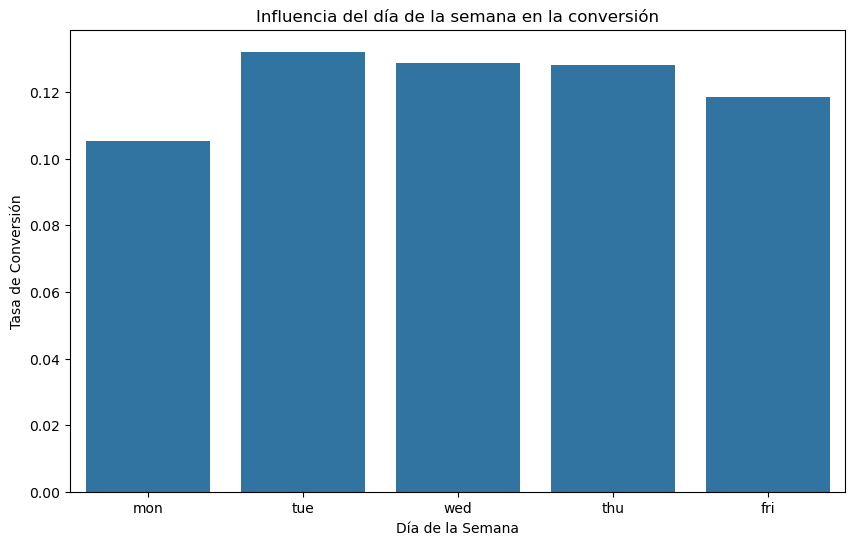

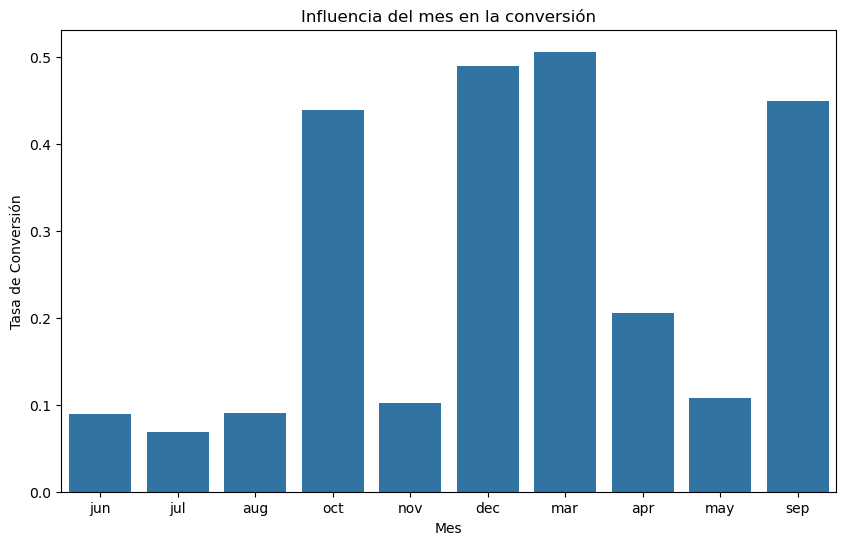

In [24]:
#P2: Influencia del día de la semana y mes
plt.figure(figsize=(10, 6))
sns.barplot(x='dia_semana', y='target', data=train_marketing, errorbar=None, estimator=np.mean)
plt.title('Influencia del día de la semana en la conversión')
plt.xlabel('Día de la Semana')
plt.ylabel('Tasa de Conversión')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='mes', y='target', data=train_marketing, errorbar=None, estimator=np.mean)
plt.title('Influencia del mes en la conversión')
plt.xlabel('Mes')
plt.ylabel('Tasa de Conversión')
plt.show()


### Pregunta 4: Representar gráficamente la curva ROC del modelo y calcular su AUC en el conjunto de validación

Para calcular la curva ROC, empleamos la función `roc_curve`, que toma como entrada el **target** del conjunto de testeo y las probabilidades de cada clase estimadas por el modelo con la función `predict_proba`. Esta función devuelve:
- **Tasa de falsos positivos (fpr)**
- **Tasa de verdaderos positivos**
- **Umbrales (thresholds) de puntos de corte**

Estas dos tasas son la entrada de la función `auc`, que calcula el área bajo la curva (AUC) asociada a dicha curva.

---

### Nota
Me parece curioso el orden lógico de estas funciones:
1. A partir de la **ROC**, se obtienen las tasas y umbrales de puntos de corte (y no al revés).
2. Es a partir de estos puntos de corte que se calcula el área bajo la curva (AUC).  
Entiendo que este orden sigue lapartir de la curva.


AUC: 0.8020722931258459


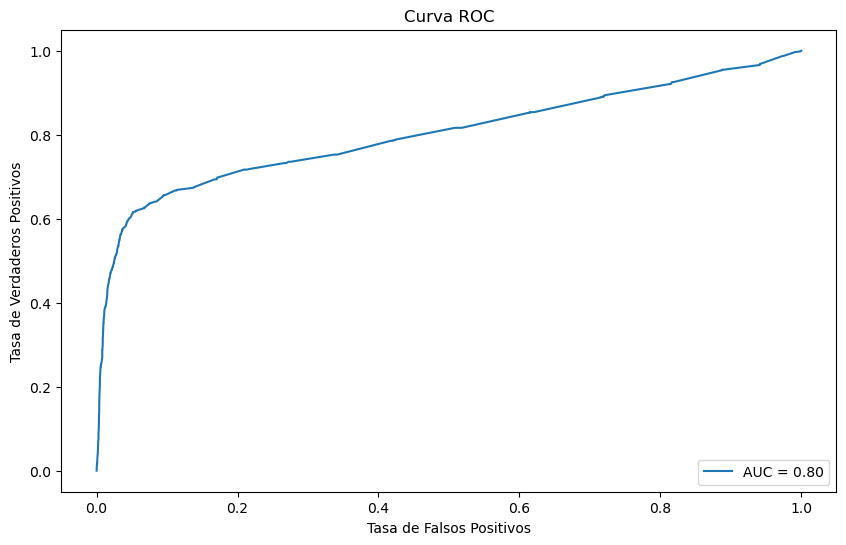

In [26]:
#P4: Curva ROC y AUC
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = auc(fpr, tpr)
print("AUC:", auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()


### Pregunta 5: El banco quiere optimizar los costes de la campaña utilizando el modelo que acabas de entrenar

El banco te indica que cada llamada tiene un coste de **5€** y que el beneficio por contratación del producto es de **50€**. Por tanto, el balance neto de la campaña se calcula con la fórmula:

**Balance = 50€ x Clientes que contratan - 5€ x Clientes contactados**

Para maximizar el balance, se necesita que el mayor número posible de llamadas termine en contratación. Por ejemplo:
- Si se llama a 10 clientes y ninguno contrata, el balance es **-50€**.
- Si contratan 5, el balance sería **200€**.

El banco utilizará el modelo entrenado para decidir a qué clientes llamar:
- Solo se contactará a aquellos con una probabilidad de contratación superior a un cierto **umbral**.
- Utilizando el conjunto de validación, debes hallar el umbral que maximiza  Datos iniciales
El conjunto de validación contiene **8,536 clientes contactados**, de los cuales **643 contrataron**. Usando la fórmula anterior, el balance inicial de la campaña fue de **-10,530€**. ¡Un desastre!

Lo que se pide en este ejercicio es realizar un **backtesting**, simulando qué habría pasado si se hubiese utilizado el modelo. Debes calcular:
1. El número de clientes contactados en función de las probabilidades de tu modelo.
2. El número de clientes que contrataron.

---

### Resolución
Para resolver esta pregunta:
1. **Predicciones y umbrales:**  
   Usamos los umbrales de probabilidad devueltos por la función ROC.  

2. **Bucle de optimización:**  
   Recorremos los distintos umbrales y contactamos únicamente a los clientes con una probabilidad de contratación superior al umbral actual.  
   - Los casos exitosos serán aquellos en los que los clientes contactados contrataron el servicio.
   - Calculamos el balance económico usando la fórmula.  
   - Almacenamos el balance junto con el umbral evaluado.  

3. **Actualización de resultados:**  
   - Si en una iteración se obtiene un mejor balance, actualizamos las variables correspondientes.
   - Nota: Inicialicé la variable `best_balance` en **0**, pero obtuve un error, ya que el balance puede ser negativo. Resolví este problema utilizando `-float('inf')`, una solución curiosa y lógica que aprendí con ChatGPT.

---

### Resultados

Se obtiene un resultado muy positivo, **aumentando el beneficio de la campaña en más de 25,000€**. 

El modelo estima que el mejor umbral para optimizar el balance de la campaña es contactar a los clientes con una probabilidad de contratación superior al **23.5%**.
.


a y optimizar el balance económico del banco.


In [28]:
#P5: Optimización de balance
best_balance = -float('inf')
best_threshold = 0
for threshold in thresholds:
    predicted = (probs >= threshold).astype(int) #evaluamos qué clientes son contactados para cada umbral
    contacts = predicted.sum()
    successes = ((predicted == 1) & (y_test == 1)).sum()
    balance = 50 * successes - 5 * contacts
    if balance > best_balance:
        best_balance = balance
        best_threshold = threshold

print("Mejor umbral:", best_threshold)
print("Balance óptimo de la campaña:", best_balance, "€")


Mejor umbral: 0.235
Balance óptimo de la campaña: 15780 €


### Ajuste de hiperparámetros para el modelo clasificador
El proceso es análogo al primer ejercicio, pero con las siguientes diferencias:
- Métrica de evaluación: utilizamos la **precisión** como métrica en lugar de MAE.
- El objetivo es mejorar la clasificación en categorías.

1. Configuramos **GridSearchCV** de manera similar:
   - Definimos el grid de hiperparámetros.
   - Especificamos la métrica y los parámetros adicionales.

2. Entrenamos el modelo ajustado:
   - Obtenemos el mejor modelo con `best_estimator_`.
   - Realizamos la predicción y evaluamos el modelo.

**Resultados:** Para el **Ejercicio 2**, tampoco obtenemos mejoras significativas tras el ajuste de hiperparámetros.


In [36]:
#Evaluación de la precisión ajustando hiperparámetros
param_grid = {
    'n_estimators': [100, 200],      #Menos valores para el número de árboles
    'max_depth': [None, 20],         #Menos opciones de profundidad
    'min_samples_split': [2, 10],    #División mínima
    'min_samples_leaf': [1, 2],      #Menos valores para hojas mínimas
    'max_features': ['sqrt']         #Fijar un valor común para max_features
}

grid_search = GridSearchCV(
    estimator=model,              
    param_grid=param_grid,        
    scoring='precision',          
    cv=5,                         
    verbose=1,                    
    n_jobs=-1                     
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
best_precision = precision_score(y_test, predictions)

print("Precisión del mejor modelo:", best_precision)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Precisión del mejor modelo: 0.738562091503268
